# 

# Ch. 6 – Outliers

This notebook is about outliers.

## Outliers

It is not uncommon to obtain data which has some missing observations,
perhaps even some nearly impossible values and funky distributions.
There are remedies and procedures to diagnose and tackle these kinds of
issues in statistics, some easy, some more tricky, and controversial.
This text will not get deeply involved in the analysis of these issues,
but I will present the basics. It is worth saying here that sometimes
these problems may lead to insurmountable challenges for the analysis
but more often there are simple techniques that can mitigate the
problem. The key in all these operations is that you are transparent in
what you do and explain why an operation was done to the data and what
the operation was.

Unusually high or low value in the data may have catastrophic impact on
the descriptive and inferential statistics. The source of the unusual
value, which we call an outlier could have been caused by a typo in the
data, or a conversion error (mistaking comma with the full stop as the
decimal separator or something else), or sometimes in a large sample
extreme value just appear in the data. Outliers will cause problems for
the traditional analysis operations such as calculating the means,
carrying out t-tests, correlations, and regressions, as these
calculations usually assume a normal distribution of values and an
extreme value will likely violate this assumption. The practical reason
for treating outliers in the first place is that they may render these
calculations misleading as the extremes wield a high leverage on
otherwise relatively stable values that tend to centre around a mean.

The first diagnostic action towards findings out the potential outliers
is to visualise the data. If you plot the histograms or boxplots of your
variables or scatterplots between two variables, the outliers are
usually quite easily visible in these visualisations (see Figure 6.3 for
an example). It is a sensible idea always to get a feel for the
distribution of the data by plotting the values in a meaningful fashion
(boxplots are always a good starting point). The shape of the
distribution might reveal other unwanted issues such as all values being
clustered near one end of a scale (called a ceiling effect or a floor
effect where the measurement scale is attenuated because it is not
sensitive enough, or it is oversensitive, scoring only few values at the
positive extreme of the scale). Or visualisation between two variables
might reveal that the relationship between the two variables is not a
linear one but still clear and regular but in a polynomial relation
(e.g. U-shaped or inverted U-shaped pattern). It is possible to diagnose
the potential outliers using several quantitative techniques, but before
mentioning two options, let me warn that there is no definite
recommendation on what is classified as an outlier, as different types
of data, distributions, and disciplinary orientations might have
slightly different practices for dealing with these offending values.
One of the most used measure already introduced earlier with relation to
boxplots is to use interquartile range (IQR) to define the range of
acceptable values (outliers are above 75% quantile plus 1.5 × IQR or
below 25% quantile minus 1.5 × IQR).

In [ ]:
library(tidyverse,quiet=TRUE)
library(ggplot2,quiet=TRUE)
library(cowplot,quiet=TRUE)
library(MusicScienceData,quiet=TRUE)
options(repr.plot.width = 7, repr.plot.height = 4) # Default plot size for Colab

## Boxplot and outliers

### Code 6.3

Figure 6.1. A histogram showing the distribution of responses to a
particular question (no. 25) in Attitudes towards Sad Music (ASM)
instrument.

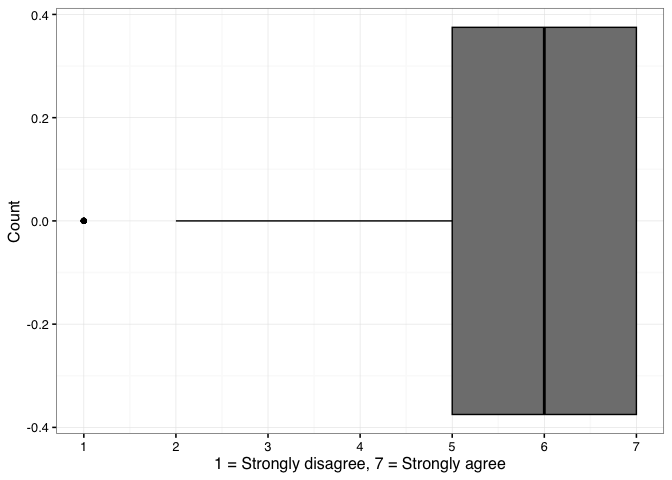

In [ ]:
sadness <- MusicScienceData::sadness
g1 <- sadness %>%
  drop_na(ASM25) %>%   # drop missing values
  ggplot(aes(x = ASM25))+
  geom_boxplot(fill="grey50", colour='black')+
  scale_x_continuous(breaks = seq(1,7,by=1))+
  ylab('Count')+
  xlab('1 = Strongly disagree, 7 = Strongly agree')+
  theme_MusicScience()
print(g1)

The boxplot shows the distribution of answers of attitudes towards sad
music (question 25). Boxplot diagnoses ratings of 1 as outliers
(indicated by the dot at the value of 1). The median of that
distribution is 6 and lower end of the IQR is 5 and the interquartile
range is 2, so the lower threshold for the outliers is 2 (5-2×1.5) and
therefore the few values of 1 are singled out as potential outliers.
Let’s verify the calculation so we understand the routine.

### Code 6.4

In [ ]:
MD <- median(sadness$ASM25,na.rm=TRUE)     # median
print(paste('Median:',MD))

[1] "Median: 6"

[1] "Interquartile range: 2"

[1] "Lower threshold for outliers: 2"

The second example comes from the priming study and the reaction time
responses (see Figure 6.2). The mean response time was 632 ms, the upper
threshold for outliers using the IQR-based technique is 930 ms and the
lower threshold is 254 ms, so any value below 254 ms or above 930 ms
could be considered as a potential outlier. To be fair, reaction times
are not even supposed to be normally distributed and they have strong
right skewed shape caused by participants tendency to respond
asymmetrically (more responses towards the slow end of the response than
the fast). There is a specific way to eliminate too fast reactions
(\<200ms) or slow reactions (\>1500ms) (Brysbaert & Stevens, 2018), and
even after this, the analysis of the reaction time data will utilise a
statistical operation that is suited to the specific distribution of the
data (e.g. GLMM with shifted log-normal distribution) or apply a log
transformation of the data. But as we can see from Figure below,
eliminating over 40 timed out responses (\>2000 ms) does make the data
much cleaner.

### Code 6.6

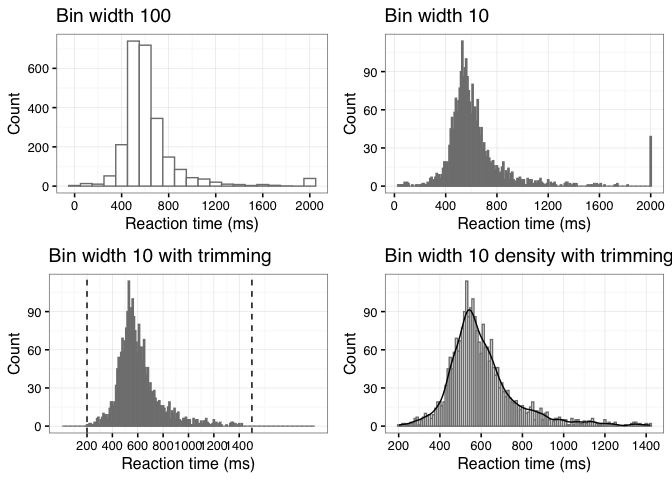

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 10) # Default plot size for Colab
d <- MusicScienceData::priming

g1<-ggplot(d,aes(x=RT))+
  geom_histogram(binwidth=100,colour='grey50',fill='white')+
  ggtitle('Bin width 100')+
  ylab('Count')+
  xlab('Reaction time (ms)')+
  scale_x_continuous(breaks=seq(0,2000,by=400))+
  theme_MusicScience()

g2<-ggplot(d,aes(x=RT))+
  geom_histogram(binwidth=10,colour='grey50',fill='white')+
  ggtitle('Bin width 10')+
  ylab('Count')+
  xlab('Reaction time (ms)')+
  scale_x_continuous(breaks=seq(0,2000,by=400))+
  theme_MusicScience()

g3<-ggplot(dplyr::filter(d,RT>200 & RT<1500),aes(x=RT))+
  geom_histogram(binwidth=10,colour='grey50',fill='white')+
  ggtitle('Bin width 10 with trimming')+
  ylab('Count')+
  xlab('Reaction time (ms)')+
  scale_x_continuous(breaks=seq(200,1500,by=200),limits = c(0,2000))+
  geom_vline(xintercept = c(200,1500),linetype='dashed')+
  theme_MusicScience()

g4<-ggplot(dplyr::filter(d,RT>200 & RT<1500),aes(x=RT))+
  geom_histogram(binwidth=10,colour='grey50',fill='white')+
  geom_density(aes(y=10 * after_stat(count)),alpha=0.5,colour='black',fill=NA)+
  ggtitle('Bin width 10 density with trimming')+
  ylab('Count')+
  xlab('Reaction time (ms)')+
  scale_x_continuous(breaks=seq(200,1500,by=200))+
  theme_MusicScience()

G1 <- plot_grid(g1, g2, g3, g4, nrow = 2)
print(G1)

If the IQR-based method is the first way to diagnose outliers, the other
common way of diagnosing outliers is to convert the variables into
Z-scores, where the mean is 0 and the standard deviation is 1. A z-score
of -4 would mean that it is four standard deviations from the mean. One
rule of thumb suggests that observations ±3 standard deviations from the
mean are potential outliers. Besides these two simple metrics, there are
more sophisticated ways to identify outliers such as using normal
distribution (Grubb’s method) or a distance measure (Mahalanobis method)
but ultimately the yardstick for making decisions based on any technique
is subjective and must be clearly explained and motivated.

## Dealing with outliers

After diagnosing that there are outliers in the data, you need to decide
what to do with them. It is possible to keep the outliers in the data if
the analysis can work with outliers and not to be disruptively
influenced by them. For instance, if the analysis operations can be done
with non-parameteric inferential statistics that rely on ranks (the
order of the values) – not the actual distances – between the
observations, this can avoid the detrimental effect of the outliers to
statistical inferences (see Chapter 7). There are also variant
techniques to carry out correlation and regression analyses that are
designed to work with data that partially violate assumptions of
normality (e.g., rank correlations, robust regression, and lasso
regression). Similar operations exist for comparing means, ranging from
non-parametric variants of t-test (Mann-Whitney U test) and ANOVA
(Kruskal-Wallis test) to generalised linear mixed models (GLMMs), where
one can change the underlying assumptions of the distribution from
normal distribution to something else that reflects the underlying data
better. A simpler option is either to eliminate the outliers or replace
them with the nearest plausible data (sometimes called Winsorising)
where you trim the values to the edge of the definition of the outliers.
The decision of what is an appropriate way to deal with the problematic
observations depends on many issues, but the idea of trimming them to
the edge of the outliers is to preserve the observations in the data but
just to remove their leverage (the distance from the mean) by moving
them to the acceptable range. Again, there is no hard guidance on what
the best practice for is dealing with outliers as sometimes data is
extremely rare and throwing parts of it away can handicap the analysis.
In any case, reporting the diagnosis (what diagnosis operation was used
and how many outliers were detected) and the treatment of the outliers
is always necessary.

## Missing Data

Sometimes there are missing observations in the data and the reasons for
these might be as varied as the reasons for outliers. Also, you might
have created more missing data if you decide to eliminate outliers,
which could mean that those offending extreme observations are
considered missing. If the missing is in the original observations, it
is worth considering the reason for the missing data before deciding
what to do with it; It might tell you that a survey question was badly
formed or related to a private issue that many people did not want to
respond to, they skipped a question, or perhaps the experiment data had
an erroneous coding for a trial. When the missing observations are
clearly linked to such a data collection issue, it might be best to
report this as it is. When the amount of missing data is low and not
clearly linked to any known issue, there are several ways to deal with
them. One of them is to allow them to be missing, and most of the
analysis operations is competent statistical software suites can deal
with the omissions. These missing observations, if they are coded
properly in the statistical software (e.g., NA in R) and not as values
of any kind (coding missing values as zeros is downright dangerous as
further calculations will then start to treat them as actual values).
For instance, in the examples above, I have dropped missing observations
when constructing plots (line 3 in Code 6.6) and tables (Table 6.3) and
calculating means (the example just below the table above).

In most cases, reporting how many missing observations there are and
whether they are specifically affecting the study design is sufficient
to press on with the analysis with keeping the data as it (with the
missing observations in the data frame if they are properly coded as
missing). More advanced ways of dealing with the missing observations is
to infer the missing values from the other variables (imputation) or to
interpolate the missing observations from the other data (Howell, 2008),
but the prudent use of either of these techniques requires sophisticated
data analysis skills and I would not recommend following the route of
filling in the gaps in the data with educated guesses, unless this is
absolutely necessary and you know exactly what you are doing.

## Non-Normal Distributions

The final issue of data quality relates to the distribution of the data.
Most of the operations I have talked about – and will be talking about
in the Chapter 7 – assumes that the observations fall into the normal
distribution, which is symmetric and governed by mean and variance of a
specific kind (σ^2). When the observations have wildly different
distribution from this one, skewed in one direction (asymmetrical), or
heteroscedastic (where the variation is uneven across the range of a
variable), one might need to revert to statistical operations designed
to handle non-normal distributions (non-parametric operations) or to try
to transform the observations into something closer to normal
distribution. There is nothing suspicious or problematic in the act of
transforming a variable if it makes the analysis and interpretation
easier, but again one must report and justify such operations carefully.
We have already come across one common transformation that is often
applied to reaction time data, namely logarithmic transform. Other
transformations for data that has positive skew is a square root
transformation. There is also a technique called power transformation
which attempts to find the best transformation that creates the closest
match to the normal distribution (also known as *Box-Cox* technique). A
statistical software packages come with routines that can identify
violations from normality such as Kolmogorov-Smirnov or Shapiro-Wilk’s
tests. Rather than blindly attempting to use a neat transformation to
rescue a problematic variable, I would recommend common sense approach
where the underlying reason for the non-normality of the distribution is
considered. If it is something that typically happens with the
measurements (such as reaction time data) and not just a poorly designed
measure with a ceiling or floor effects, the transformation is easy to
motivate and apply. In other cases, it probably wise to take a deep
breath and consult advanced statistics guide, e.g., Howell (2016), or
see recommendations at the end of the book.

## References

-   Eerola, T., & Peltola, H.-R. (2016). Memorable experiences with sad
    music - reasons, reactions and mechanisms of three types of
    experiences. *PloS ONE, 11(6)*, e0157444.
    <https://doi.org/http://dx.doi.org/10.1371/journal.pone.0157444>

-   Eerola, T., & Vuoskoski, J. K. (2011). A comparison of the discrete
    and dimensional models of emotion in music. *Psychology of Music,
    39(1)*, 18–49.